In [1]:
import numpy as np 
import matplotlib.pyplot as plt

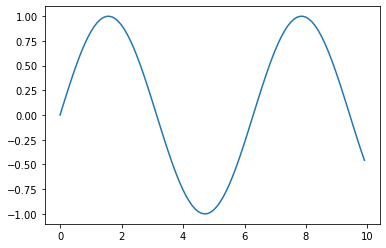

In [2]:
#The variabels of the program 
data_len = 100
train_data_len = 70
test_data_len = 30
num_weights = 35
learning_rate = 0.01
variance = 1
epochs = 100
error_val = []
point_range = data_len/10
# print(point_range)
x = np.arange(0,point_range,0.1)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [3]:
def sort_list(data):
    data = np.hsplit(data,2)
    unsorted_list = data[0]
    unsorted_list_temp = []
    for item in unsorted_list:
        unsorted_list_temp.append(item[0])
    sorted_list_temp = unsorted_list_temp
    sorted_list_temp.sort()
    unsorted_list_1 = data[1]
    list_temp = []
    for item in unsorted_list_1:
        list_temp.append(item[0])
    unsorted_list_1 = list_temp
    sorted_list = []
    for item in sorted_list_temp:
        index = np.where(unsorted_list == item)
        sorted_list.append([item,unsorted_list_1[index[0][0]]])
    
    return np.array(sorted_list)

def apend_values(data_size,train_index):
    index = []
    data = []
    for i in range(data_size):
        if i not in train_index:
            index.append(i)
            data.append([x[i],y[i]])
    data = np.array(data)
    index = np.array(index)
    return index,data
    
training_data = []
training_index = []
testing_data = []
testing_index = []
while (len(training_index) < train_data_len):
#     print("Populating the data ")
    random_index = np.random.randint(100)
    if random_index not in training_index:
        training_index.append(random_index)
        training_data.append([x[random_index],y[random_index]])
#
training_data = np.asarray(training_data)
training_index = np.asarray(training_index)
# Sorting the training data
training_data = sort_list(training_data)
testing_index,testing_data = apend_values(data_len,training_index)
# print(np.shape(training_data))

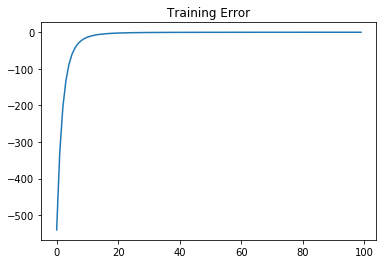

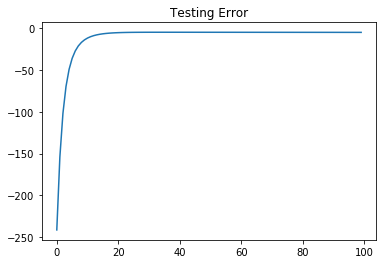

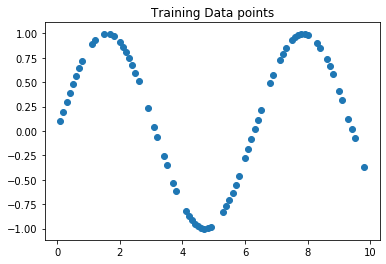

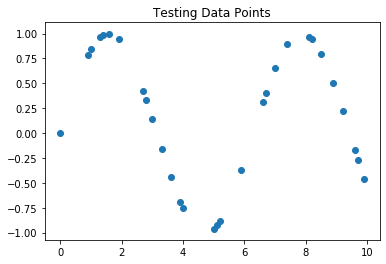

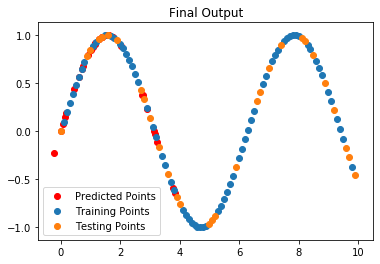

In [11]:
# print(training_data.shape)
def weights_update(train_data, range_len, weights):
    ratio = train_data/range_len
    weights_index = weights*ratio
    weights_index = int(weights_index)
    weights_list = []
    weights_list.append(weights_index)
    return weights_list, weights_index

weights = []
for i in range((num_weights)):
    weights.append(float(np.random.randint(100))/100)
# For the training Error
train_error = []
test_error = []
test_pred_pts = []
train_pred_pts = []
for i in range(epochs):
    train_error_temp = []
    prediction_error = []
    for indexes in range(training_data.shape[0]):
        train_input = training_data[indexes][0]
        train_out = training_data[indexes][1]
        ratio = train_input/point_range
        weights_index = (num_weights*ratio)
        weights_list = []
        for weights_in in range(len(weights)):
            if (weights_in<weights_index+variance) and (weights_in>weights_index-variance-1):
                if (weights_in<weights_index-variance) and (weights_in>=weights_index-variance-1):
                    weights_list.append(weights_index+1-(weights_index-variance))
                elif (weights_in<=weights_index+variance) and (weights_in>weights_index+variance-1):
                    weights_list.append(weights_index+variance-weights_in)
                else:
                    weights_list.append(1)
            else:
                weights_list.append(0)
        weights_list_temp = []
        
        for weights_in in range(len(weights)):
            weights_list_temp.append(weights_list[weights_in]*weights[weights_in])
                    
        output = 0
        
        for weights_in in range(len(weights)):# check this line for error
            output = output + weights_list_temp[weights_in]*train_input
        #Error calculation and weights summation
        error = train_out-output
        train_error_temp.append(error)
        prediction_error.append(output)
        summation_weights = sum(weights_list)
        
        for weights_in in range(len(weights)):
            weights[weights_in] = weights[weights_in]+error*learning_rate*weights_list[weights_in]/summation_weights
    train_error.append(sum(train_error_temp))
    ##############################################################3
      # For the testing error
    testing_error_temp =[]
    prediction_error = []
#     print(testing_data.shape[0])
    for test_in in range(testing_data.shape[0]):
        test_inp = testing_data[test_in][0]
        test_out = testing_data[test_in][1]
        ratio = test_inp/point_range
        test_weights_index = num_weights*ratio
        test_weights_index = int(test_weights_index)
        test_weights_list = []
        for weights_in in range(len(weights)):
            if (weights_in<test_weights_index+variance) and (weights_in>test_weights_index-variance-1):
                if (weights_in<test_weights_index-variance) and (weights_in>test_weights_index-variance-1):
                    test_weights_list.append(test_weights_index+1-(test_weights_index-variance))
                elif (weights_in<=test_weights_index+variance) and (weights_in>test_weights_index+variance-1):
                    test_weights_list.append(test_weights_index+variance-weights_in)
                    print(test_weights_index+variance-weights_in)
                else:
                    test_weights_list.append(1)
            else:
                test_weights_list.append(0)
        
        output = 0
        weights_list_temp = []
        for weights_in in range(len(weights)):
            weights_list_temp.append(test_weights_list[weights_in]*weights[weights_in])
            
        for weights_in in range(len(weights)):
            output = output + weights_list_temp[weights_in]*test_in
        #Error calculation
        error = test_out-output
        testing_error_temp.append(error)
        prediction_error.append(output)
    test_pred_pts.append(prediction_error)
    test_error.append(sum(testing_error_temp))

#############################################################
#Plotting Functions
plt.title("Training Error")
plt.plot(train_error)
plt.savefig("continuous_training_error.jpg")
plt.show()

plt.title("Testing Error")
plt.plot(test_error)
plt.savefig("continuous_testing_error.jpg")
plt.show()
plt.title("Training Data points")
plt.scatter(training_data[:,0],training_data[:,1])
plt.savefig("continuous_training.jpg")
plt.show()
plt.title("Testing Data Points")
plt.scatter(testing_data[:,0],testing_data[:,1])
plt.savefig("continuous_testing.jpg")
plt.show()
#Normalize the data for the function
test_pred_pts = np.array(test_pred_pts)
test_pred_pts[1] = test_pred_pts[1]/3.5
plt.title("Final Output")
plt.scatter(test_pred_pts[1],np.sin(test_pred_pts[1]),color ="r",label="Predicted Points")
plt.scatter(training_data[:,0],training_data[:,1],label = "Training Points" )
plt.scatter(testing_data[:,0],testing_data[:,1],label = "Testing Points")
plt.legend()
plt.savefig("continuous_final.jpg")
plt.show()
